#  	Zachary’s karate club network from the movie karate kids   

Consider the Zachary’s karate club network from the movie karate kids. Here Zachary tried to analyze conflicts and fission in small groups. The dataset called karate.gml is obtained from https://doi.org/10.6084/m9.figshare.7985174.v1.[GML - Graph Modelling Language.]  It contains 34 nodes representing individuals within the karate club. The edges in the network are given by interactions between two individuals outside the activities of the club such as actual lessons or meetings. 

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

### 1.Create a graph from the karate.gml file. Display all the basic information about the network.

In [63]:
fname = 'karate.gml'
K = nx.read_gml(fname)

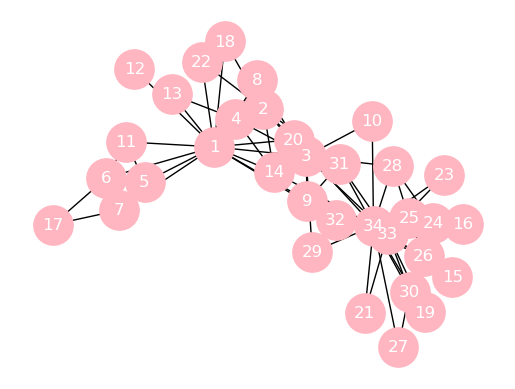

In [27]:
#The graph visualization
nx.draw_networkx(K, node_color='lightpink',
font_color='white',
node_size=800,
pos=nx.spring_layout(K))
limits = plt.axis('off')
plt.show()

In [31]:
#basic information
G = nx.read_gml(fname)

pathlengths = []

print("source vertex {target:length, }")
for v in G.nodes():
    spl = dict(nx.single_source_shortest_path_length(G, v))
    print(f"{v} {spl} ")
    for p in spl:
        pathlengths.append(spl[p])

print()
print(f"average shortest path length {sum(pathlengths) / len(pathlengths)}")

# histogram of path lengths
dist = {}
for p in pathlengths:
    if p in dist:
        dist[p] += 1
    else:
        dist[p] = 1

print()
print("length #paths")
verts = dist.keys()
for d in sorted(verts):
    print(f"{d} {dist[d]}")


source vertex {target:length, }
1 {'1': 0, '2': 1, '3': 1, '4': 1, '5': 1, '6': 1, '7': 1, '8': 1, '9': 1, '11': 1, '12': 1, '13': 1, '14': 1, '18': 1, '20': 1, '22': 1, '32': 1, '31': 2, '10': 2, '28': 2, '29': 2, '33': 2, '17': 2, '34': 2, '25': 2, '26': 2, '24': 3, '15': 3, '16': 3, '19': 3, '21': 3, '23': 3, '30': 3, '27': 3} 
2 {'2': 0, '1': 1, '3': 1, '4': 1, '8': 1, '14': 1, '18': 1, '20': 1, '22': 1, '31': 1, '5': 2, '6': 2, '7': 2, '9': 2, '11': 2, '12': 2, '13': 2, '32': 2, '10': 2, '28': 2, '29': 2, '33': 2, '34': 2, '17': 3, '25': 3, '26': 3, '24': 3, '15': 3, '16': 3, '19': 3, '21': 3, '23': 3, '30': 3, '27': 3} 
3 {'3': 0, '1': 1, '2': 1, '4': 1, '8': 1, '9': 1, '10': 1, '14': 1, '28': 1, '29': 1, '33': 1, '5': 2, '6': 2, '7': 2, '11': 2, '12': 2, '13': 2, '18': 2, '20': 2, '22': 2, '32': 2, '31': 2, '34': 2, '24': 2, '25': 2, '15': 2, '16': 2, '19': 2, '21': 2, '23': 2, '30': 2, '17': 3, '26': 3, '27': 3} 
4 {'4': 0, '1': 1, '2': 1, '3': 1, '8': 1, '13': 1, '14': 1, '5':

In [30]:
print(f"radius: {nx.radius(G)}")
print(f"diameter: {nx.diameter(G)}")
print(f"eccentricity: {nx.eccentricity(G)}")
print(f"center: {nx.center(G)}")
print(f"periphery: {nx.periphery(G)}")
print(f"density: {nx.density(G)}")
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Average degree:", sum(dict(G.degree()).values()) / G.number_of_nodes())
print("Graph density:", nx.density(G))
print("Is the graph directed?", nx.is_directed(G))
print("Is the graph connected?", nx.is_connected(G))
print("Is the graph a tree?", nx.is_tree(G))
print("Is the graph a bipartite graph?", nx.is_bipartite(G))

radius: 3
diameter: 5
eccentricity: {'1': 3, '2': 3, '3': 3, '4': 3, '5': 4, '6': 4, '7': 4, '8': 4, '9': 3, '10': 4, '11': 4, '12': 4, '13': 4, '14': 3, '15': 5, '16': 5, '17': 5, '18': 4, '19': 5, '20': 3, '21': 5, '22': 4, '23': 5, '24': 5, '25': 4, '26': 4, '27': 5, '28': 4, '29': 4, '30': 5, '31': 4, '32': 3, '33': 4, '34': 4}
center: ['1', '2', '3', '4', '9', '14', '20', '32']
periphery: ['15', '16', '17', '19', '21', '23', '24', '27', '30']
density: 0.13903743315508021
Number of nodes: 34
Number of edges: 78
Average degree: 4.588235294117647
Graph density: 0.13903743315508021
Is the graph directed? False
Is the graph connected? True
Is the graph a tree? False
Is the graph a bipartite graph? False


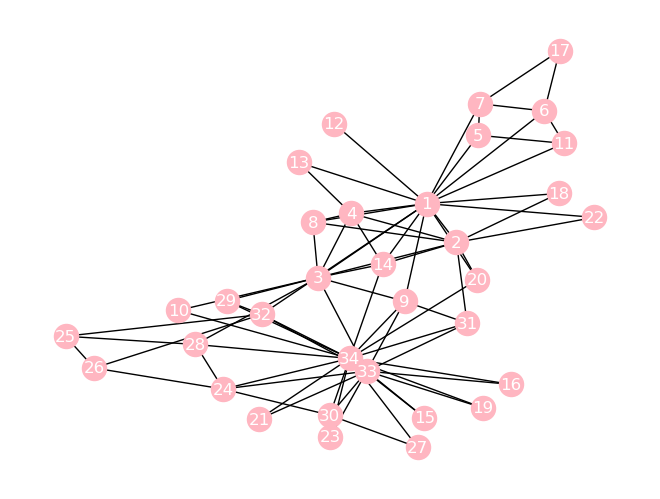

In [34]:
pos = nx.spring_layout(G, seed=3068)  # Seed layout for reproducibility
nx.draw(G, pos=pos, with_labels=True,font_color="white",node_color='lightpink')
plt.show()

### Store all the metadata of the actors in the network.

In [64]:
K.degree(['1', '34'])

DegreeView({'1': 16, '34': 17})

In [65]:
#we can first add info to the nodes like the m=name of the nedes,the age etc..
# K.add_node('1', name='Mr.Hi', role='hero')
# K.add_node('2', attribute1='value3', attribute2='value4')
# K.add_node('3', attribute1='value5', attribute2='value6')
# K.add_node('34', name='Mr.John', role='antagonist')

In [66]:
for node_label in K.nodes:
    node_info = K.nodes[node_label]
    print(f"Information about node '{node_label}':")
    print(node_info)

Information about node '1':
{}
Information about node '2':
{}
Information about node '3':
{}
Information about node '4':
{}
Information about node '5':
{}
Information about node '6':
{}
Information about node '7':
{}
Information about node '8':
{}
Information about node '9':
{}
Information about node '10':
{}
Information about node '11':
{}
Information about node '12':
{}
Information about node '13':
{}
Information about node '14':
{}
Information about node '15':
{}
Information about node '16':
{}
Information about node '17':
{}
Information about node '18':
{}
Information about node '19':
{}
Information about node '20':
{}
Information about node '21':
{}
Information about node '22':
{}
Information about node '23':
{}
Information about node '24':
{}
Information about node '25':
{}
Information about node '26':
{}
Information about node '27':
{}
Information about node '28':
{}
Information about node '29':
{}
Information about node '30':
{}
Information about node '31':
{}
Information about

In [67]:
mr_hi = [*range(1, 10), *range(11, 15),
17, 18, 20, 22]
club = {}
for m in range(1, 35):
    if m in mr_hi:
        club[str(m)] = "Mr. Hi"
    else:
        club[str(m)] = "John A."

In [68]:
nx.set_node_attributes(K, club, 'club')

In [71]:
#info of each node and the the club they belong to is added
nodes = K.nodes(data=True)
print(list(nodes)[:34])


[('1', {'club': 'Mr. Hi'}), ('2', {'club': 'Mr. Hi'}), ('3', {'club': 'Mr. Hi'}), ('4', {'club': 'Mr. Hi'}), ('5', {'club': 'Mr. Hi'}), ('6', {'club': 'Mr. Hi'}), ('7', {'club': 'Mr. Hi'}), ('8', {'club': 'Mr. Hi'}), ('9', {'club': 'Mr. Hi'}), ('10', {'club': 'John A.'}), ('11', {'club': 'Mr. Hi'}), ('12', {'club': 'Mr. Hi'}), ('13', {'club': 'Mr. Hi'}), ('14', {'club': 'Mr. Hi'}), ('15', {'club': 'John A.'}), ('16', {'club': 'John A.'}), ('17', {'club': 'Mr. Hi'}), ('18', {'club': 'Mr. Hi'}), ('19', {'club': 'John A.'}), ('20', {'club': 'Mr. Hi'}), ('21', {'club': 'John A.'}), ('22', {'club': 'Mr. Hi'}), ('23', {'club': 'John A.'}), ('24', {'club': 'John A.'}), ('25', {'club': 'John A.'}), ('26', {'club': 'John A.'}), ('27', {'club': 'John A.'}), ('28', {'club': 'John A.'}), ('29', {'club': 'John A.'}), ('30', {'club': 'John A.'}), ('31', {'club': 'John A.'}), ('32', {'club': 'John A.'}), ('33', {'club': 'John A.'}), ('34', {'club': 'John A.'})]


###  Calculate all types of centrality (degree, betweenness, closeness, eigenvector, pagerank centrality).
#### Analyse the nodes based on the centrality values.Write a note on this. 

In [72]:
# Degree Centrality
degree_cent = nx.degree_centrality(K)

# Betweenness Centrality
betweenness_cent = nx.betweenness_centrality(K)

# Closeness Centrality
closeness_cent = nx.closeness_centrality(K)

# Eigenvector Centrality
eigenvector_cent = nx.eigenvector_centrality(K)

# PageRank Centrality
pagerank_cent = nx.pagerank(K)

# Print centrality measures for each node
for node in G.nodes:
    print(f"Node: {node}")
    print(f"Degree Centrality: {degree_cent[node]}")
    print(f"Betweenness Centrality: {betweenness_cent[node]}")
    print(f"Closeness Centrality: {closeness_cent[node]}")
    print(f"Eigenvector Centrality: {eigenvector_cent[node]}")
    print(f"PageRank Centrality: {pagerank_cent[node]}")
    print()


Node: 1
Degree Centrality: 0.48484848484848486
Betweenness Centrality: 0.43763528138528146
Closeness Centrality: 0.5689655172413793
Eigenvector Centrality: 0.35548349418519426
PageRank Centrality: 0.09700181758983706

Node: 2
Degree Centrality: 0.2727272727272727
Betweenness Centrality: 0.053936688311688304
Closeness Centrality: 0.4852941176470588
Eigenvector Centrality: 0.2659538704545024
PageRank Centrality: 0.052878391037427

Node: 3
Degree Centrality: 0.30303030303030304
Betweenness Centrality: 0.14365680615680618
Closeness Centrality: 0.559322033898305
Eigenvector Centrality: 0.3171893899684447
PageRank Centrality: 0.05707842304763673

Node: 4
Degree Centrality: 0.18181818181818182
Betweenness Centrality: 0.011909271284271283
Closeness Centrality: 0.4647887323943662
Eigenvector Centrality: 0.21117407832057056
PageRank Centrality: 0.035860643223064786

Node: 5
Degree Centrality: 0.09090909090909091
Betweenness Centrality: 0.0006313131313131313
Closeness Centrality: 0.37931034482758

In [76]:
degree_centrality = nx.degree_centrality(K)
def draw_graph_with_centrality(G, centrality_measure, measure_name):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    nx.draw_networkx_nodes(G, pos, node_size=300, node_color='skyblue')
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos, labels={node: f"{centrality_measure[node]:.2f}" for node in G.nodes()},
                            font_size=8)
    plt.title(f"Karate Network - {measure_name} Centrality")
    plt.axis('off')
    plt.show()

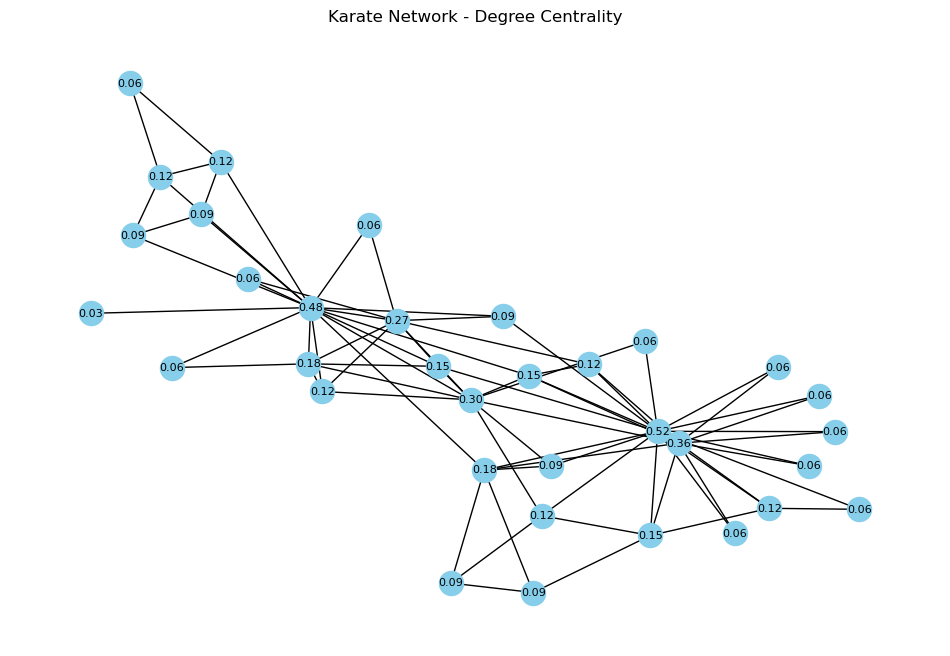

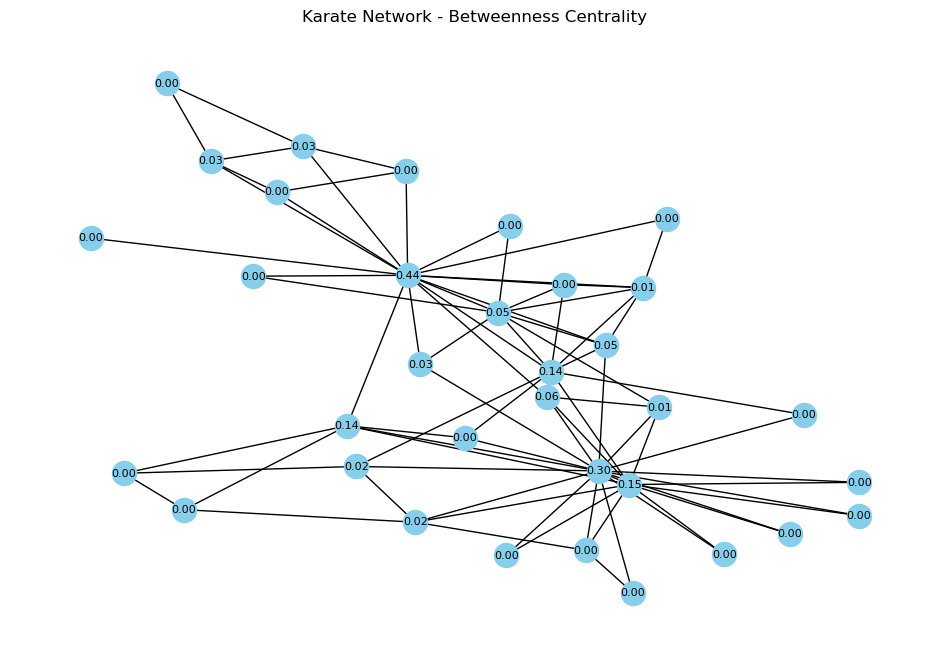

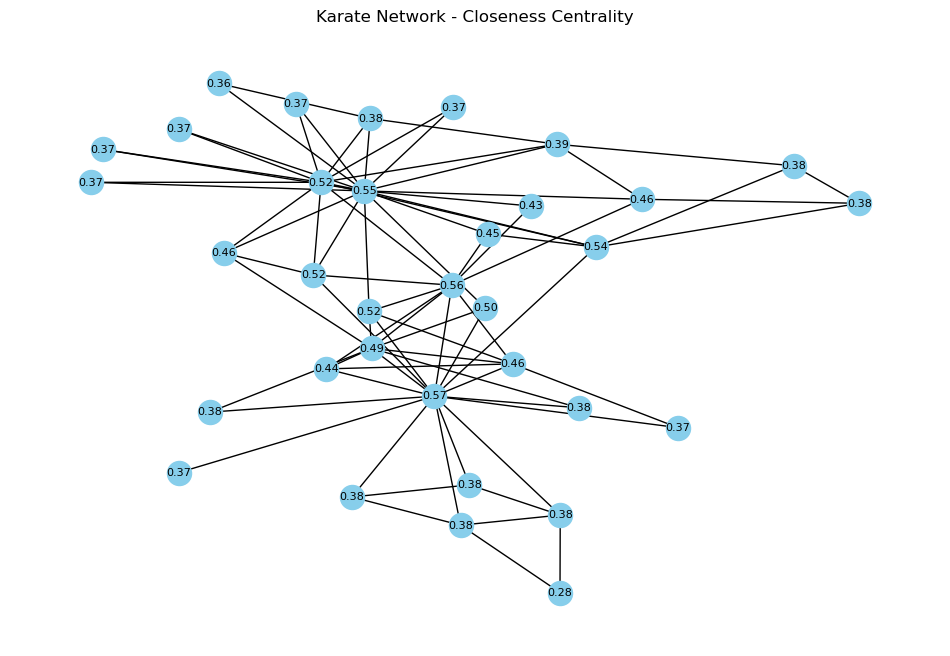

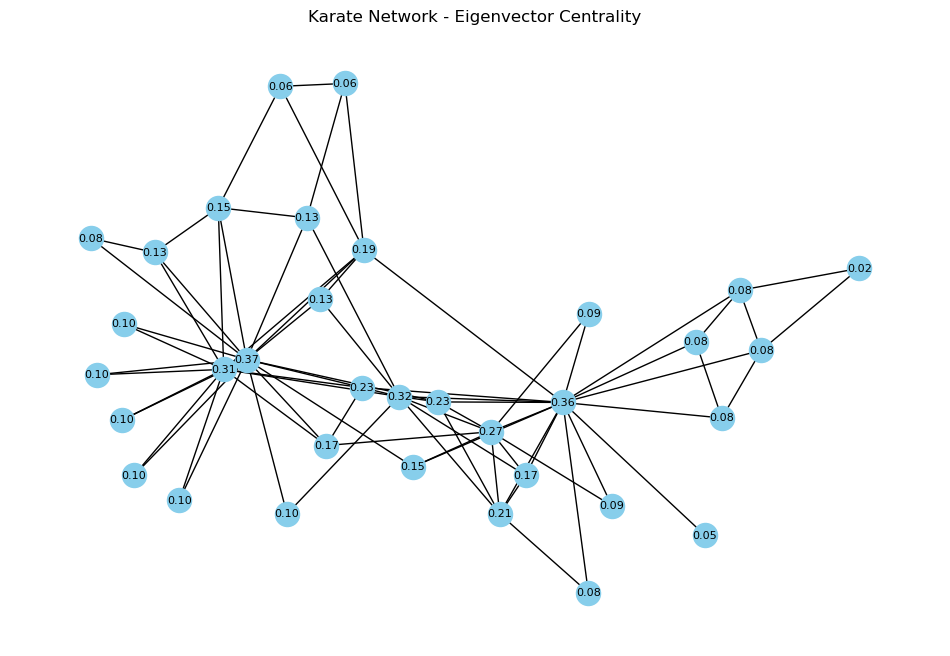

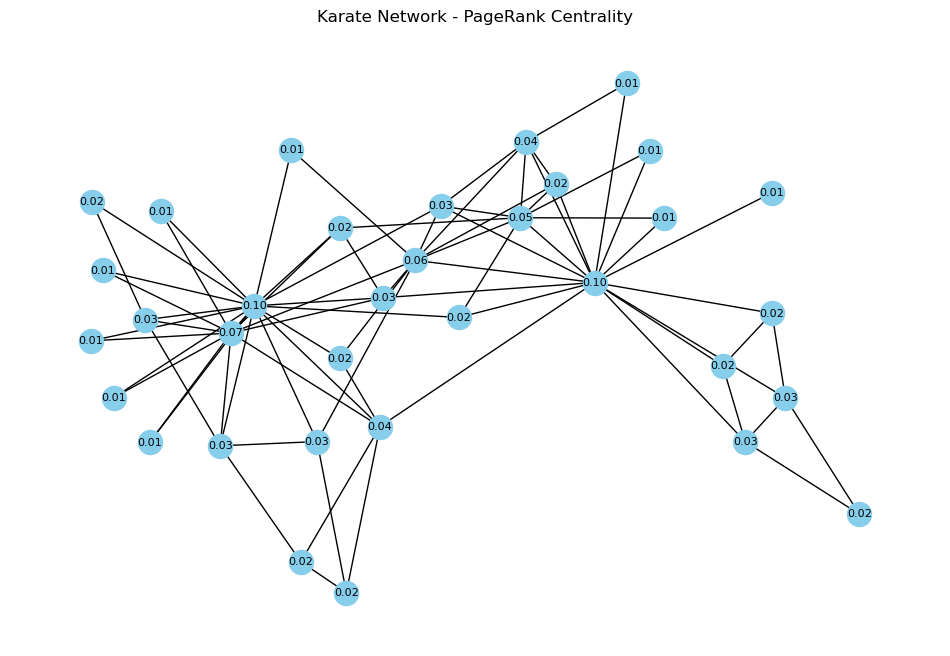

In [78]:
# Draw graph for each centrality measure
draw_graph_with_centrality(G, degree_cent, "Degree")
draw_graph_with_centrality(G, betweenness_cent, "Betweenness")
draw_graph_with_centrality(G, closeness_cent, "Closeness")
draw_graph_with_centrality(G, eigenvector_cent, "Eigenvector")
draw_graph_with_centrality(G, pagerank_cent, "PageRank")

#### Degree Centrality
We know the degree centrality of node 1(Hi) and 34(John) is the highest   
But the other nodes can be seen
We can see in the below graphs how the degree centrality keeps the information about the network

In [79]:
kdeg = K.degree()


In [82]:
print(kdeg['1'])
print(kdeg['6'])
print(kdeg['9'])
print(kdeg['24'])

16
4
5
5


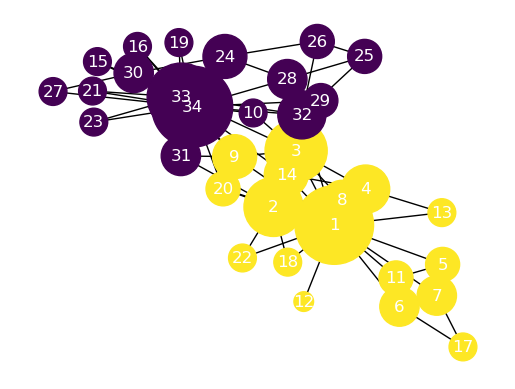

In [103]:
import itertools
nodes = K.nodes(data=True)
clubs = set(nx.get_node_attributes(K,'club').values())
mapping = dict(zip(sorted(clubs),itertools.count()))
colors = list(mapping[n[1]['club']] for n in nodes)

nx.draw_networkx(K, node_color=colors,font_color="white",
node_size=[200*val for (node, val) in kdeg])
limits = plt.axis('off')
plt.show()

In [92]:
def get_top_nodes(cdict, num=5):
    top_nodes = {}
    for i in range(num):
        top_nodes = dict(sorted(cdict.items(), key=lambda x: x[1],reverse=True)[:num])
    return top_nodes

get_top_nodes(dict(kdeg))


{'34': 17, '1': 16, '33': 12, '3': 10, '2': 9}

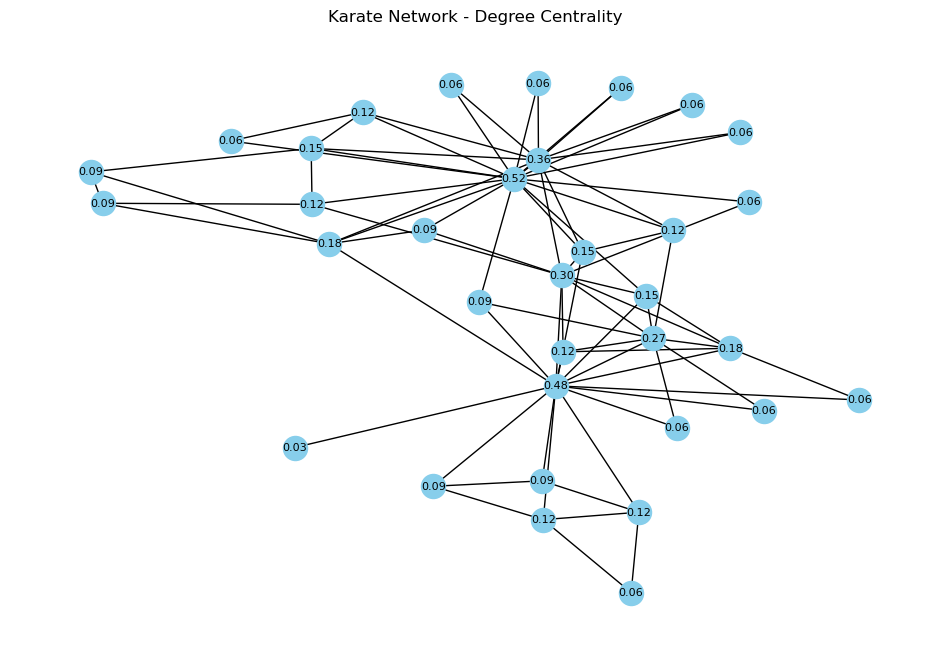

In [94]:
degree_centrality = nx.degree_centrality(K)
nx.set_node_attributes(K,degree_centrality, 'dc')
draw_graph_with_centrality(G, degree_centrality, "Degree")

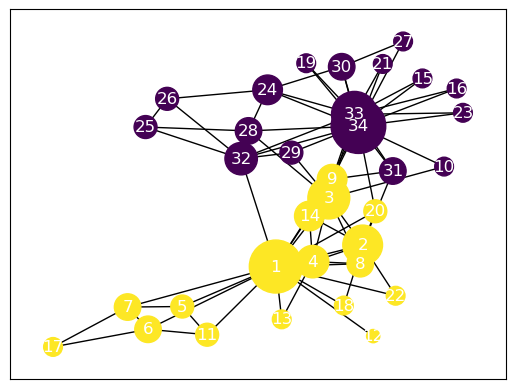

In [100]:
nx.draw_networkx(K, node_color=colors,font_color="white",
node_size=[3000 * v for v in
nx.get_node_attributes(K, 'dc').values()])

#### Betweeness Centrality
It tells us about the influence of particular nodes over the network

In [106]:
betweenness_centrality =nx.betweenness_centrality(K)
nx.set_node_attributes(K,betweenness_centrality, 'bc')

In [110]:
#get top nodes
get_top_nodes(betweenness_centrality)

{'1': 0.43763528138528146,
 '34': 0.30407497594997596,
 '33': 0.145247113997114,
 '3': 0.14365680615680618,
 '32': 0.13827561327561325}

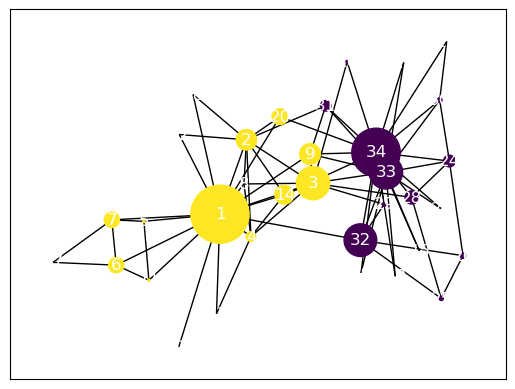

In [112]:
nx.draw_networkx(K, node_color=colors,font_color="white",
node_size=[4000 * v for v in
nx.get_node_attributes(K, 'bc').values()])


#### Closeness Centrality
The flow of information in the network was an important way to ensure that the decision taken during meetings favoured the faction with a majority. A way to assess which nodes are able to spread information more efficiently is given by the closeness.

In [113]:
closeness_centrality = nx.closeness_centrality(K)
nx.set_node_attributes(K,closeness_centrality, 'cc')

In [114]:
get_top_nodes(closeness_centrality)

{'1': 0.5689655172413793,
 '3': 0.559322033898305,
 '34': 0.55,
 '32': 0.5409836065573771,
 '9': 0.515625}

The closeness measure of the nodes is very similar and showing this measure as the size of the nodes results in a plot that does not showcase the importance of certain nodes.

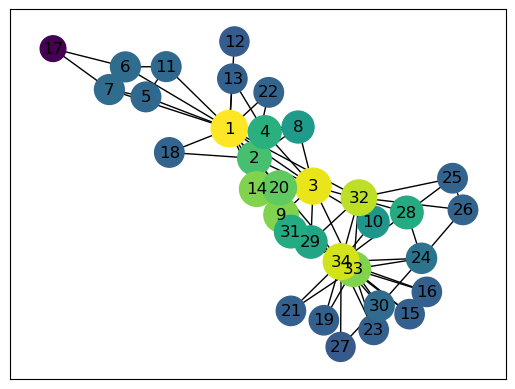

In [117]:
pos = nx.spring_layout(K)
ec = nx.draw_networkx_edges(K, pos=pos)
nc = nx.draw_networkx_nodes(K, pos=pos,
node_color=[v for v in
nx.get_node_attributes(K, 'cc').values()],
node_size=[1200 * v for v in
nx.get_node_attributes(K, 'cc').values()])
lb = nx.draw_networkx_labels(K,pos =pos)

#### Eigen Value Centrality
We can now turn our attention to what nodes are best connected within the network. We have seen that the eigenvector centrality provides a view of the nodes that are endorsed by influential actors.

In [119]:
eigenvector_centrality = nx.eigenvector_centrality(K)
nx.set_node_attributes(K, eigenvector_centrality,'ec')


In [120]:
get_top_nodes(eigenvector_centrality)

{'34': 0.37337121301323506,
 '1': 0.35548349418519426,
 '3': 0.3171893899684447,
 '33': 0.3086510477336959,
 '2': 0.2659538704545024}

We see John A. be an influencer, with a higher eigenvector
centrality than Mr. Hi. Once again, node 2 makes an
appearance, together with nodes 3 and 33

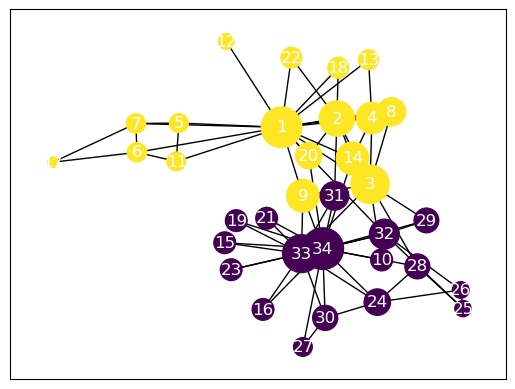

In [123]:
nx.draw_networkx(K, node_color=colors,font_color="white",node_size=[2400 * v for v in
nx.get_node_attributes(K, 'ec').values()])

#### PageRank Algorithm

In [125]:
pagerank_centrality = nx.pagerank(K)
nx.set_node_attributes(K,pagerank_centrality, 'pr')

In [126]:
 get_top_nodes(pagerank_centrality)


{'34': 0.1009179167487121,
 '1': 0.09700181758983706,
 '33': 0.07169213006588289,
 '3': 0.05707842304763673,
 '2': 0.052878391037427}

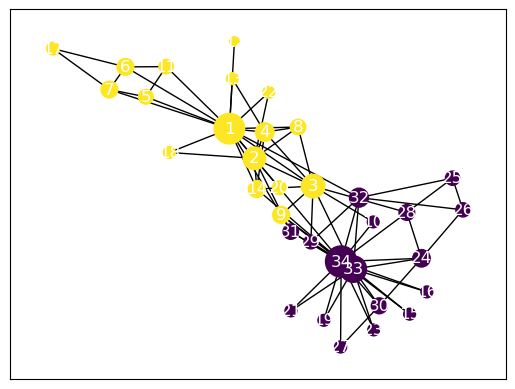

In [130]:
nx.draw_networkx(K, node_color=colors,font_color="white",
node_size=[5000 * v for v in
nx.get_node_attributes(K, 'pr').values()],
pos=pos)


### 4.Find the possible k-components of the network and the clustering coefficient.


In [131]:
ccoeff = nx.clustering(K)
print(ccoeff['1'])

0.15


In [132]:
avg_ccoeff = nx.average_clustering(K)
print(avg_ccoeff)


0.5706384782076823


In [133]:
components = nx.k_components(K)


In [134]:
print(components[4])


[{'4', '1', '34', '14', '2', '9', '33', '31', '3', '8'}]


In [135]:
cl = nx.find_cliques(K)

In [142]:
path_length = nx.all_pairs_shortest_path_length(K)

In [143]:
n = len(K.nodes())
distances = np.zeros((n, n))

from scipy.cluster import hierarchy
from scipy.spatial import distance

for u, p in path_length:
    for v, d in p.items():
        distances[int(u) - 1][int(v) - 1] = d
sd = distance.squareform(distances)
h = hierarchy.average(sd)

In [140]:
# Calculate possible k-components
k_components = nx.k_components(G)

# Print possible k-components
print("Possible k-components:")
for k, components in k_components.items():
    print(f"k = {k}:")
    for i, component in enumerate(components, start=1):
        print(f"  Component {i}: {component}")
    print()

# Calculate clustering coefficient
clustering_coefficient = nx.average_clustering(G)
print(f"\nClustering Coefficient: {clustering_coefficient:.4f}")

Possible k-components:
k = 4:
  Component 1: {'4', '1', '34', '14', '2', '9', '33', '31', '3', '8'}

k = 3:
  Component 1: {'1', '26', '34', '14', '20', '9', '31', '30', '28', '4', '29', '2', '24', '33', '25', '3', '32', '8'}
  Component 2: {'1', '11', '7', '6', '5'}

k = 2:
  Component 1: {'1', '16', '26', '19', '22', '34', '14', '20', '9', '18', '15', '21', '31', '23', '30', '28', '4', '29', '27', '2', '24', '33', '13', '25', '3', '32', '10', '8'}
  Component 2: {'17', '1', '11', '7', '6', '5'}

k = 1:
  Component 1: {'1', '20', '9', '18', '15', '31', '7', '28', '4', '27', '2', '13', '32', '10', '5', '8', '12', '16', '34', '22', '26', '19', '14', '21', '23', '30', '11', '29', '6', '24', '33', '17', '25', '3'}


Clustering Coefficient: 0.5706


### 5.Find out the communities using Girvan-Newman algorithm and Louvain method. 

##### Girvan-Newman algorithm
Girvan-Newman has found that
two nodes would naturally switch
sides. This confirms explanations
provided by Zachary.


In [148]:
from networkx.algorithms import community 
comp = community.girvan_newman(K)
communities = tuple(sorted(c) for c in next(comp))

In [149]:
len(communities)


2

In [150]:
c_1 = K.subgraph(communities[0])
c_2 = K.subgraph(communities[1])


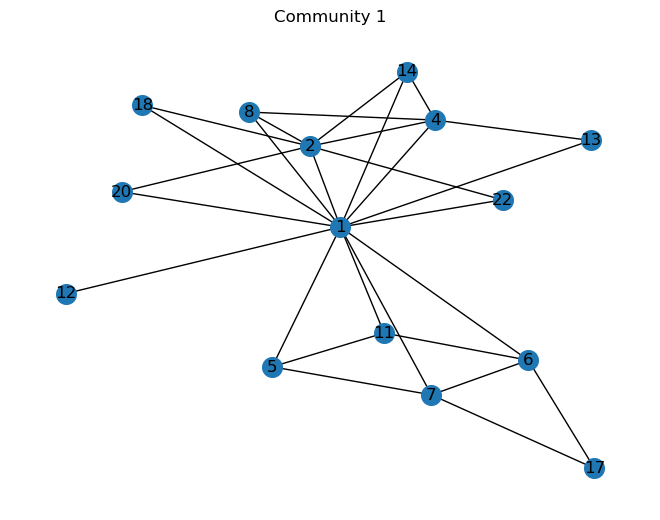

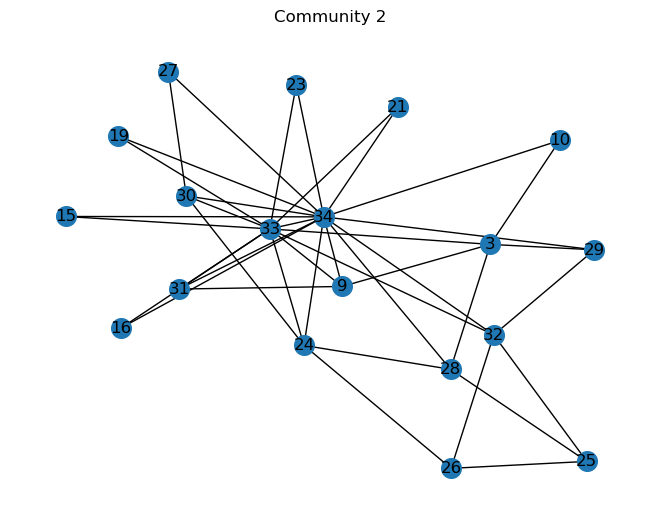

In [156]:
pos_1 = nx.spring_layout(c_1)  # positions for all nodes
nx.draw(c_1, pos_1, with_labels=True, node_size=200)
plt.title('Community 1')
plt.show()

# Draw the second subgraph
pos_2 = nx.spring_layout(c_2)  # positions for all nodes
nx.draw(c_2, pos_2, with_labels=True, node_size=200)
plt.title('Community 2')
plt.show()

In [160]:
comm = {}
for c in c_1:
    comm[str(c)] = 'community 1'
for c in c_2:
    comm[str(c)] = 'community 2'
nx.set_node_attributes(K, comm, 'comm')

##### Louvain Method

In [161]:
 pip install python-louvain

     ---------------------------------------- 0.0/204.6 kB ? eta -:--:--
     -- ------------------------------------- 10.2/204.6 kB ? eta -:--:--
     ----- ------------------------------- 30.7/204.6 kB 435.7 kB/s eta 0:00:01
     -------------- ---------------------- 81.9/204.6 kB 657.6 kB/s eta 0:00:01
     ----------------------- ------------ 133.1/204.6 kB 871.5 kB/s eta 0:00:01
     -------------------------------------- 204.6/204.6 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9403 sha256=e1b9b117a5143b93a23e50c90bd2e7da065cb1b9fa03c474cfa7e1f893d24c5b
  Stored in directory: c:\users\91821\appdata\local\pip\cache\wheels\11\c1\e7\f62a211c636275e2da798bf0c307a3ae79aeddaf2524a03ce4
Successfully built python-louvain
Note: you may need to restart the kernel to use updated packages.


In [162]:
import community
louvain = community.best_partition(K)


In [169]:
for i in set(louvain.values()):
    print('Community '.format(i))
    members = [n for n in louvain.keys()
    if louvain[n] == i]
    print(members)


Community 
['1', '2', '3', '4', '8', '10', '12', '13', '14', '18', '20', '22']
Community 
['9', '15', '16', '19', '21', '23', '27', '30', '31', '33', '34']
Community 
['24', '25', '26', '28', '29', '32']
Community 
['5', '6', '7', '11', '17']


In [170]:
G = nx.karate_club_graph()


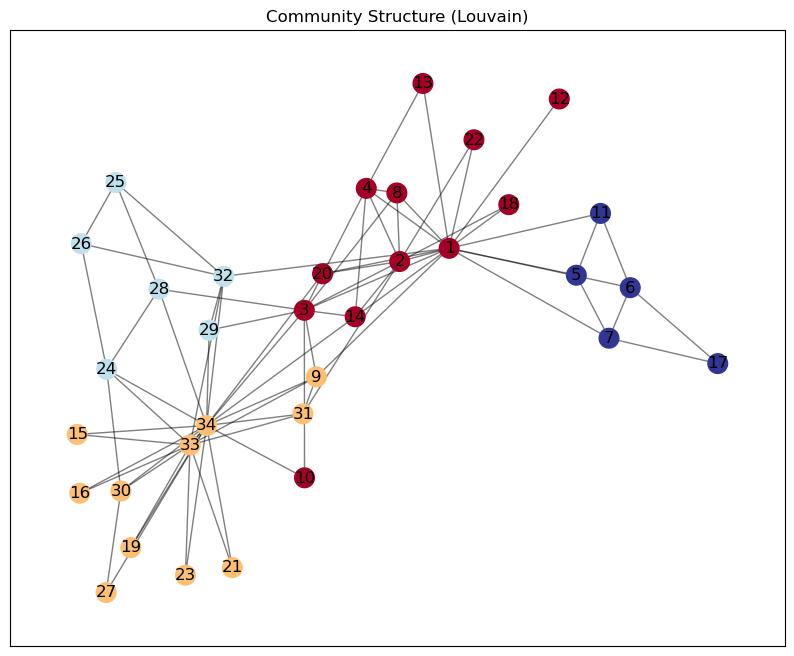

In [172]:
pos = nx.spring_layout(K)  # positions for all nodes
plt.figure(figsize=(10, 8))

# Draw nodes
nx.draw_networkx_nodes(K, pos, node_size=200, cmap=plt.cm.RdYlBu, node_color=list(louvain.values()))

# Draw edges
nx.draw_networkx_edges(K, pos, alpha=0.5)

# Draw node labels
nx.draw_networkx_labels(K, pos)

plt.title("Community Structure (Louvain)")
plt.show()